# Visualização de Séries Temporais

por **Cibele Russo**

**ICMC/USP - São Carlos SP**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Faça a leitura dos dados pelo diretório local ou diretamente pelo github
#pkgdir = '/hdd/MBA Aprendizado Dinâmico/MBA AD 2022/Aula 1/Data/'
#covidSP = pd.read_csv(f'{pkgdir}/covidSP.csv',index_col='date',parse_dates=True)

# Leitura via github
covidSP = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv',index_col='date',parse_dates=True)

In [3]:
covidSP

,confirmed,deaths
date,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0
2020-03-01,0,0
...,...,...
2020-12-26,1253,13
2020-12-27,2836,55
2020-12-28,1576,39


## Lidando com datas 

In [4]:
covidSP.index

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='date', length=302, freq=None)

**Caso o índice não seja do tipo DatetimeIndex, algumas alternativas podem ser utilizadas:**


In [5]:
idx = pd.date_range('25/2/2020', periods=7, freq='D')
idx

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02'],
              dtype='datetime64[ns]', freq='D')

In [6]:
idx = pd.date_range('25/02/2020', periods=7, freq='M')
idx

DatetimeIndex(['2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31'],
              dtype='datetime64[ns]', freq='M')

In [7]:
idx = pd.to_datetime(['Feb 02, 2020','2/25/2020','25-Feb-2020',None])
idx

DatetimeIndex(['2020-02-02', '2020-02-25', '2020-02-25', 'NaT'], dtype='datetime64[ns]', freq=None)

In [8]:
np.array(['2020-02-25', '2020-02-26', '2020-02-27'], dtype='datetime64[h]')

array(['2020-02-25T00', '2020-02-26T00', '2020-02-27T00'],
      dtype='datetime64[h]')

In [9]:
datas = np.array(['2020-02-25', '2020-02-26', '2020-02-27'], dtype='datetime64[D]')
datas

array(['2020-02-25', '2020-02-26', '2020-02-27'], dtype='datetime64[D]')

In [10]:
idx = pd.DatetimeIndex(datas)
idx

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27'], dtype='datetime64[ns]', freq=None)

**Existem outras possibilidades!**

## Visualização de dados de séries temporais:

<AxesSubplot:xlabel='date'>

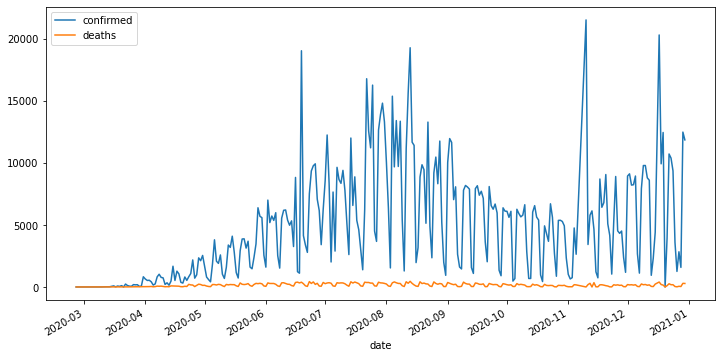

In [11]:
covidSP.plot(figsize=(12,6))

<AxesSubplot:xlabel='date'>

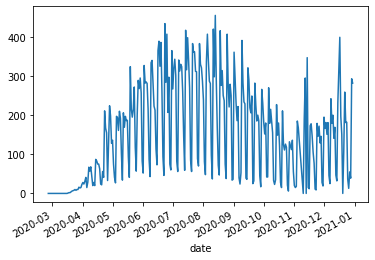

In [12]:
covidSP['deaths'].plot()

<AxesSubplot:xlabel='date'>

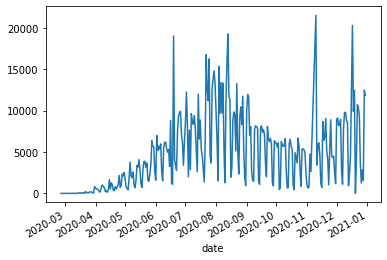

In [13]:
covidSP['confirmed'].plot()

<AxesSubplot:xlabel='date'>

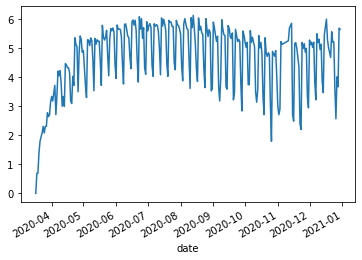

In [14]:
# Gráfico do log das mortes

np.log(covidSP.loc[covidSP['deaths']>0]['deaths']).plot()



<AxesSubplot:xlabel='date'>

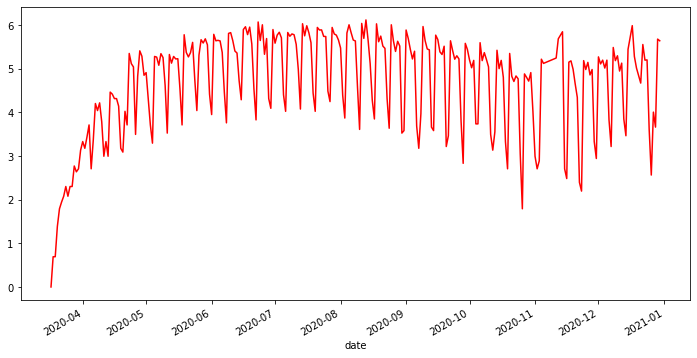

In [15]:
# Gráfico do log das mortes - mudando a cor

np.log(covidSP.loc[covidSP['deaths']>0]['deaths']).plot(c='red', figsize=(12,6))


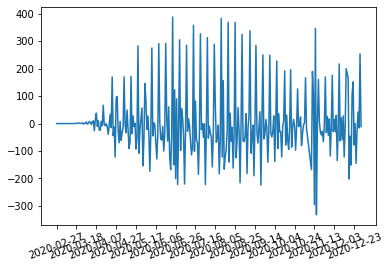

In [16]:
# Gráfico da diferença das mortes - Uma tentativa de eliminar a tendência

y = np.diff(covidSP['deaths'])
x = covidSP.index[1:]

plt.plot(x,y)
plt.xticks(np.arange(x.min(),x.max(), 20, dtype='datetime64[D]'),rotation=20);

[Text(0.5, 0, 'Tempo (dias)'), Text(0, 0.5, 'Mortes')]

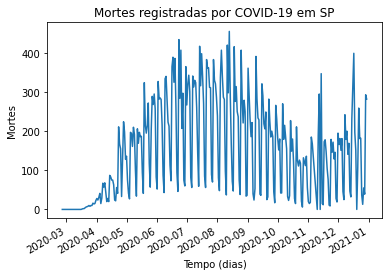

In [17]:
title = 'Mortes registradas por COVID-19 em SP'
ylabel = 'Mortes'
xlabel = 'Tempo (dias)'

ax=covidSP['deaths'].plot(title=title)
ax.autoscale(axis='both')
ax.set(xlabel=xlabel,ylabel=ylabel)

<AxesSubplot:xlabel='date'>

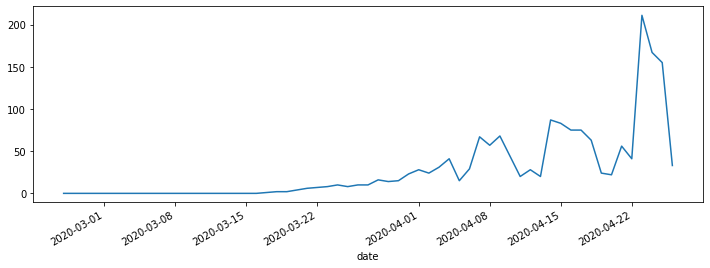

In [18]:
# Visualizando apenas uma parte da série 

covidSP['deaths']['2020-02-26':'2020-04-26'].plot(figsize=(12,4))

<AxesSubplot:xlabel='date'>

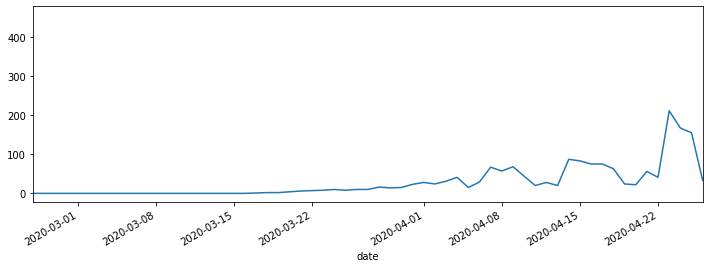

In [19]:
# Outra forma de visualizar apenas uma parte da série

covidSP['deaths'].plot(figsize=(12,4),xlim=['2020-02-26','2020-04-26'])

<AxesSubplot:xlabel='date'>

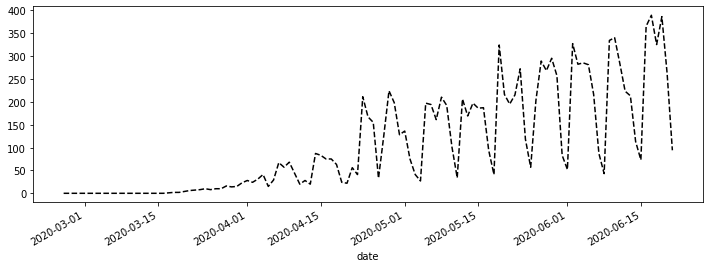

In [20]:
# Altera tipo de linha

covidSP['deaths']['2020-02-26':'2020-06-21'].plot(figsize=(12,4),ls='--',c='black')

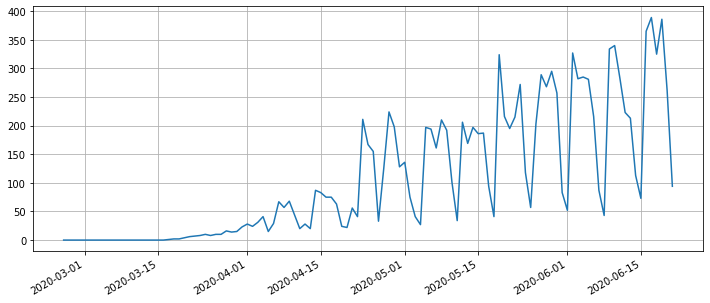

In [21]:
# Adicionando linhas de grade ao gráfico

ax=covidSP['deaths']['2020-02-26':'2020-06-21'].plot(figsize=(12,5))
ax.set(xlabel='')

ax.xaxis.grid(True)
ax.yaxis.grid(True)

**Exercício:**

Repita os gráficos acima considerando os dados covidRJ.csv de exercício anterior, e/ou de outros estados. Busque outras formas de alterar as representações gráficas.